In [1]:
%load_ext autoreload
%autoreload 2

### target 
- find the lowest parametered model, smallest possible model, maintaining the structure.
### results 
- train Accuracy: 98.66
- test Accuracy: 98.25

In [21]:
from data import get_data
from model import Model_3
from utils import train, test
import torch
import torch.optim as optim


In [14]:
train_data = get_data(train=True)
test_data = get_data(train=False)

In [15]:
SEED = 1

# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

# For reproducibility
torch.manual_seed(SEED)

if cuda:
    torch.cuda.manual_seed(SEED)

# dataloader arguments - something you'll fetch these from cmdprmt
dataloader_args = dict(shuffle=True, batch_size=128, num_workers=4, pin_memory=True) if cuda else dict(shuffle=True, batch_size=64)

# train dataloader
train_loader = torch.utils.data.DataLoader(train_data, **dataloader_args)

# test dataloader
test_loader = torch.utils.data.DataLoader(test_data, **dataloader_args)

CUDA Available? True


In [22]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)

model = Model_3().to(device)
summary(model, input_size=(1, 28, 28))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 10, 28, 28]              90
       BatchNorm2d-2           [-1, 10, 28, 28]              20
              ReLU-3           [-1, 10, 28, 28]               0
           Dropout-4           [-1, 10, 28, 28]               0
            Conv2d-5           [-1, 20, 28, 28]           1,800
       BatchNorm2d-6           [-1, 20, 28, 28]              40
              ReLU-7           [-1, 20, 28, 28]               0
           Dropout-8           [-1, 20, 28, 28]               0
         MaxPool2d-9           [-1, 20, 14, 14]               0
           Conv2d-10           [-1, 10, 14, 14]             200
      BatchNorm2d-11           [-1, 10, 14, 14]              20
             ReLU-12           [-1, 10, 14, 14]               0
           Conv2d-13           [-1, 20, 12, 12]           1,800
      BatchNorm2d-14           [-1

In [23]:
train_losses = []
test_losses = []
train_acc = []
test_acc = []

model = Model_3().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=8, gamma=0.1)


EPOCHS = 15
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    train(model, device, train_loader, optimizer, epoch, train_losses, train_acc)
    scheduler.step()
    test(model, device, test_loader, test_losses, test_acc)

EPOCH: 0


Loss=0.07355987280607224 Batch_id=468 Accuracy=92.22: 100%|██████████| 469/469 [00:08<00:00, 52.42it/s] 



Test set: Average loss: 0.0942, Accuracy: 9739/10000 (97.39%)

EPOCH: 1


Loss=0.049460362643003464 Batch_id=468 Accuracy=97.84: 100%|██████████| 469/469 [00:08<00:00, 52.18it/s]



Test set: Average loss: 0.0742, Accuracy: 9765/10000 (97.65%)

EPOCH: 2


Loss=0.04484064504504204 Batch_id=468 Accuracy=98.25: 100%|██████████| 469/469 [00:10<00:00, 46.24it/s] 



Test set: Average loss: 0.0378, Accuracy: 9876/10000 (98.76%)

EPOCH: 3


Loss=0.025306599214673042 Batch_id=468 Accuracy=98.47: 100%|██████████| 469/469 [00:09<00:00, 51.72it/s]



Test set: Average loss: 0.0384, Accuracy: 9876/10000 (98.76%)

EPOCH: 4


Loss=0.043587323278188705 Batch_id=468 Accuracy=98.60: 100%|██████████| 469/469 [00:09<00:00, 50.95it/s] 



Test set: Average loss: 0.0383, Accuracy: 9886/10000 (98.86%)

EPOCH: 5


Loss=0.04143694415688515 Batch_id=468 Accuracy=98.70: 100%|██████████| 469/469 [00:09<00:00, 51.25it/s]  



Test set: Average loss: 0.0351, Accuracy: 9892/10000 (98.92%)

EPOCH: 6


Loss=0.009345072321593761 Batch_id=468 Accuracy=98.85: 100%|██████████| 469/469 [00:09<00:00, 50.86it/s]



Test set: Average loss: 0.0312, Accuracy: 9895/10000 (98.95%)

EPOCH: 7


Loss=0.011163298971951008 Batch_id=468 Accuracy=98.82: 100%|██████████| 469/469 [00:09<00:00, 50.43it/s] 



Test set: Average loss: 0.0286, Accuracy: 9915/10000 (99.15%)

EPOCH: 8


Loss=0.009170743636786938 Batch_id=468 Accuracy=99.16: 100%|██████████| 469/469 [00:10<00:00, 45.65it/s] 



Test set: Average loss: 0.0245, Accuracy: 9921/10000 (99.21%)

EPOCH: 9


Loss=0.01717480830848217 Batch_id=468 Accuracy=99.22: 100%|██████████| 469/469 [00:09<00:00, 50.78it/s]  



Test set: Average loss: 0.0251, Accuracy: 9918/10000 (99.18%)

EPOCH: 10


Loss=0.013386443257331848 Batch_id=468 Accuracy=99.16: 100%|██████████| 469/469 [00:09<00:00, 50.30it/s] 



Test set: Average loss: 0.0242, Accuracy: 9929/10000 (99.29%)

EPOCH: 11


Loss=0.013028740882873535 Batch_id=468 Accuracy=99.25: 100%|██████████| 469/469 [00:09<00:00, 50.38it/s] 



Test set: Average loss: 0.0234, Accuracy: 9931/10000 (99.31%)

EPOCH: 12


Loss=0.01995749957859516 Batch_id=468 Accuracy=99.25: 100%|██████████| 469/469 [00:09<00:00, 49.85it/s]  



Test set: Average loss: 0.0240, Accuracy: 9929/10000 (99.29%)

EPOCH: 13


Loss=0.012689781375229359 Batch_id=468 Accuracy=99.27: 100%|██████████| 469/469 [00:10<00:00, 43.35it/s] 



Test set: Average loss: 0.0232, Accuracy: 9932/10000 (99.32%)

EPOCH: 14


Loss=0.036547478288412094 Batch_id=468 Accuracy=99.25: 100%|██████████| 469/469 [00:09<00:00, 49.57it/s] 



Test set: Average loss: 0.0239, Accuracy: 9931/10000 (99.31%)



In [24]:
t = [t_items.item() for t_items in train_losses]

Text(0.5, 1.0, 'Test Accuracy')

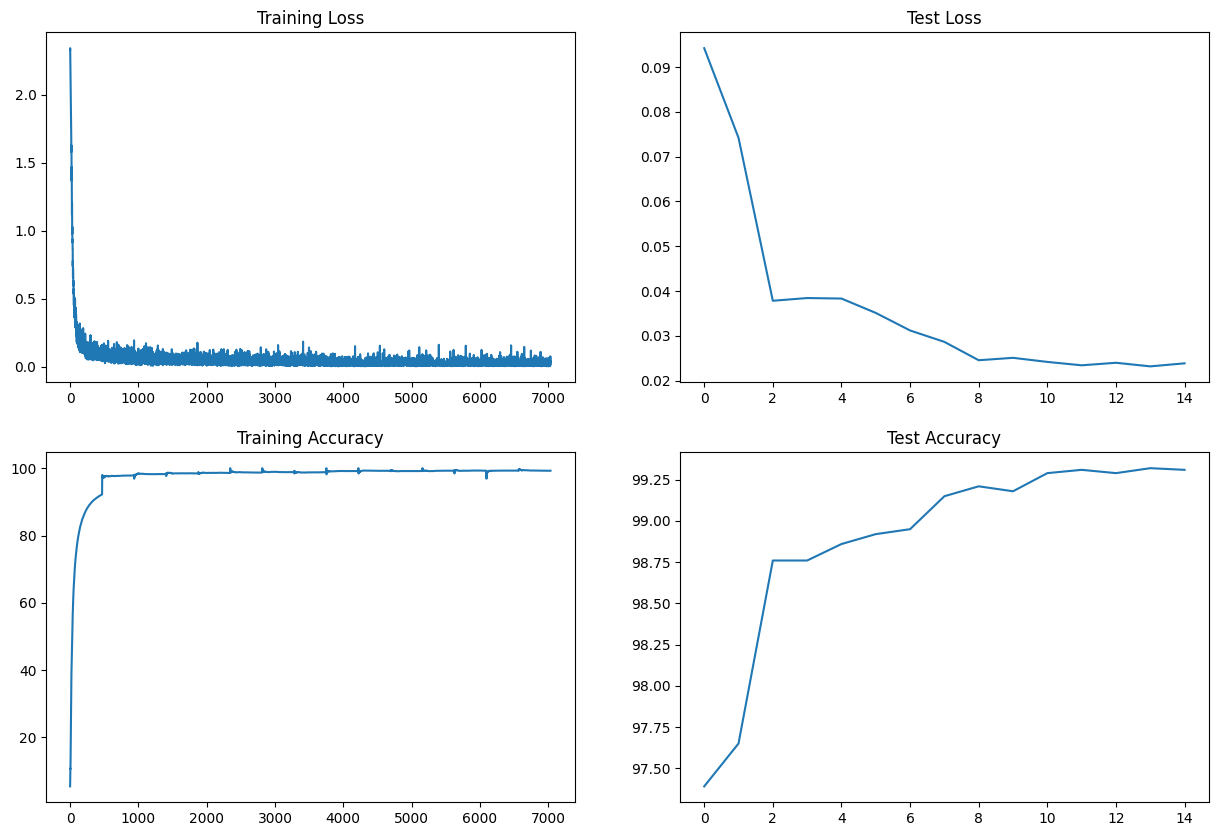

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(t)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc)
axs[1, 1].set_title("Test Accuracy")